

# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [69]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [70]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [72]:
temps = df.temperature

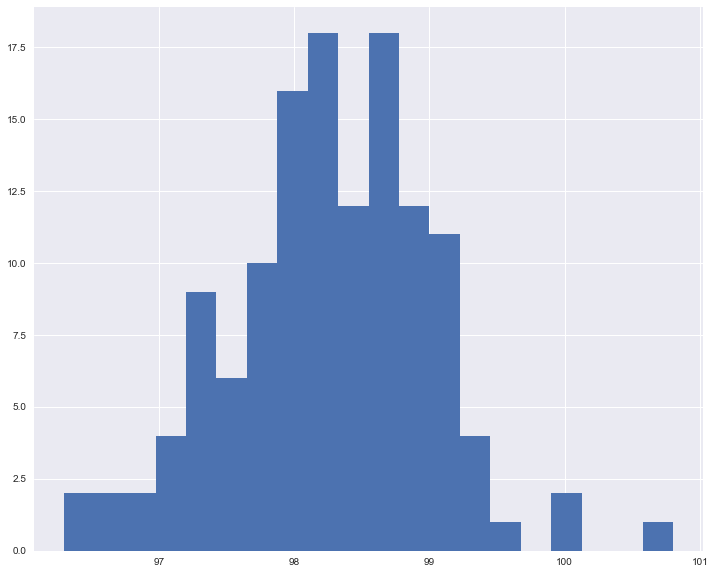

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10
temps.hist(bins = 20)

In [74]:
from scipy import stats
stats.mstats.normaltest(temps)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

**1) The distribution of body temperatures is _close enough to normal_.**

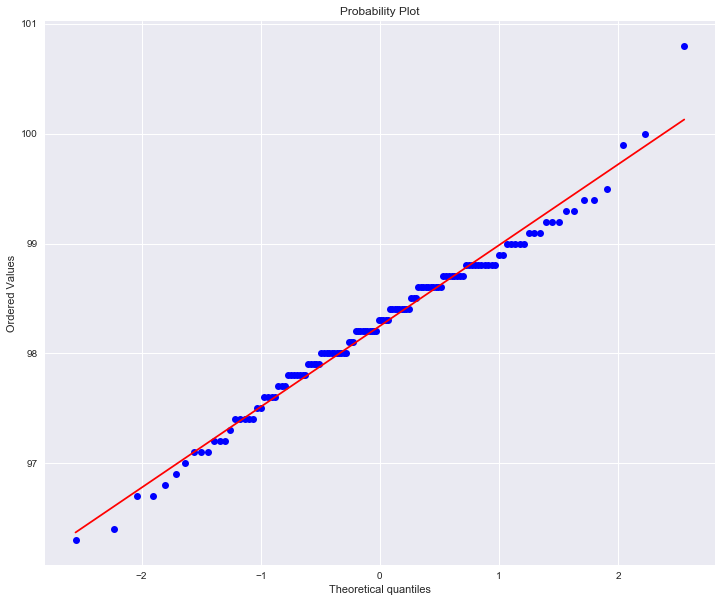

In [75]:
import pylab 
stats.probplot(temps, dist="norm", plot=pylab)
pylab.show()

**2) It's hard to judge if sample size of 130 is 'large' for working with body temperature data.**
I wonder if the people whose temperature was taken were randomly selected from the population of healthy individuals, or if a representative sample was taken. <br>
I would also assume that people's temperatures in the sample are independent of each other, unless they were all in a group of people who suffered from the same outbreak of a fever-inducing disease, or got hypothermia due to another event.

**3) Is the true population mean really 98.6 degrees F?** <br>
Let's check the sample mean first

In [76]:
temps.mean()

98.24923076923078

I use one-sample test, because we only have data for one sample of body temperatures that we compare to a previously obtained mean of 98.6 degrees. I use z-test because the sample size is larger than 30, and we can assume that population standard deviation is the same as the sample standard deviation.

In [85]:
pop_mean = 98.6
sample_mean = temps.mean()
sample_std = temps.std()
n = len(temps)
import math
z_stat = (sample_mean - pop_mean)*math.sqrt(n)/sample_std
z_stat

-5.454823292364079

Let's estimate p-value and 95% confidence interval using z-score we obtained above:

In [112]:
upper_limit = sample_mean + 1.96*sample_std/math.sqrt(n)
lower_limit = sample_mean - 1.96*sample_std/math.sqrt(n)
p_value = stats.norm.sf(abs(z_stat))*2
print('confidence interval: (%.4f, %.4f)' %(lower_limit,upper_limit))
print('p-value: %.4f' %p_value)

confidence interval: (98.1232, 98.3753)
p-value: 0.0000


If we use t-score, we get the following:

In [113]:
onesample_t_results = stats.ttest_1samp(temps, pop_mean)
onesample_t_results

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

t-score and z-score are the same, because we assumed population standard deviation is the same as the sample one.

In [135]:
stats.t.interval(0.95, n-1, loc=sample_mean, scale=stats.sem(temps))

(98.12200290560804, 98.37645863285351)

Confidence intervals based on z-score versus t-score are a little different, because calculations based on z-score take the whole sample size, and for t-score the number of degrees of freedom is one less than sample size.

**95% confidence interval for population mean is between 98.12 and 98.38 degrees Farenheit.**

In [136]:
stats.t.interval(0.99, n-1, loc=sample_mean, scale=stats.sem(temps))

(98.08110824239759, 98.41735329606396)

**99% confidence interval is between 98.08 and 98.42 degrees Farenheit. Based on this sample, it does not look like true population mean is really 98.6 degrees Farenheit.**

**4) Draw a small sample of size 10 from the data and repeat both tests. **

The correct one to use is the t-statistic, because the sample size is small.

In [138]:
np.random.seed(1020)
sample_10 = np.random.choice(temps, 10)
sample_10

array([98.6, 98.1, 99. , 98.8, 99.3, 98.8, 99. , 96.7, 98.6, 98.6])

In [139]:
sample_10.mean()

98.55

**z-test**

In [134]:
sample_10_mean = sample_10.mean()
sample_10_std = sample_10.std()
n_10 = len(sample_10)
z_stat_10 = (sample_10_mean - pop_mean)*math.sqrt(n_10)/sample_10_std
z_stat_10

-0.23002185311410536

In [140]:
upper_limit_10 = sample_10_mean + 1.96*sample_10_std/math.sqrt(n_10)
lower_limit_10 = sample_10_mean - 1.96*sample_10_std/math.sqrt(n_10)
p_value_10 = stats.norm.sf(abs(z_stat_10))*2
print('confidence interval (%.4f, %.4f)' %(lower_limit_10, upper_limit_10))
print('p-value: %.4f' %p_value_10)

confidence interval (98.1240, 98.9760)
p-value: 0.8181


**t-test**

In [141]:
onesample_t_results_10 = stats.ttest_1samp(sample_10, pop_mean)
onesample_t_results_10

Ttest_1sampResult(statistic=-0.21821789023598032, pvalue=0.8321269898606626)

In [142]:
stats.t.interval(0.95, n_10-1, loc=sample_10_mean, scale=stats.sem(sample_10))

(98.03167467839265, 99.06832532160735)

T-test confidence interval casts a much wider net, so it is a lot more careful in its predictions. This is a good thing for small sample sizes.

**5) At what temperature should we consider someone's temperature to be "abnormal"?**

Margin of error for 80% confidence level

In [154]:
ME_80 = 1.282 * stats.sem(temps)
ME_80

0.0824382623861763

Margin of error for 90% confidence level

In [156]:
ME_90 = 1.645 * stats.sem(temps)
ME_90

0.10578076569833074

In [157]:
sample_mean - ME_80, sample_mean + ME_80

(98.1667925068446, 98.33166903161695)

In [158]:
sample_mean - ME_90, sample_mean + ME_90

(98.14345000353245, 98.3550115349291)

Depending on how sure we would like to be of someone having the slightest sign of abnormal temperature, we could say:

* If your temperature is outside this interval (98.17, 98.33), then it is different from 80% of the population, and there might be cause for concern.
* If your temperature is outside this interval (98.14, 98.36), then it is different from 90% of the population, and there might be cause for concern.
* Etc.

Depending on how threatening to health it is to have a temperature that differs from a particularly large proportion of the population, we can set those margins to reflect what we consider to be 'normal' bounds for temperature

**6) Is there a significant difference between males and females in normal temperature?**

In [160]:
females = df.temperature[df.gender == 'F']
males = df.temperature[df.gender == 'M']

In [161]:
females.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [162]:
males.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [163]:
t, p = stats.ttest_ind(females, males)
print('t-statistic is %.4f' %t)
print('p-value is %.4f' %p)

t-statistic is 2.2854
p-value is 0.0239


I am using a two-sample t-test in this case. We assumed earlier that our individual data points are independend of each other, so we can also assume that the two data sets - women's and men's temperatures - are also independent of each other.<br>
**If we accept a cut-off value of 5% or even 2.4% for our p-value, we would reject the null hypothesis and say that women and men have signifcantly different normal temperatures.**

If we use z-score calculations similar to those we did in (3), we see that women's temperatures come closer to the 98.6 mark with 95% confidence interval, while men's are much further away.

In [165]:
f_mean = females.mean()
f_std = females.std()
f_n = len(females)
z_stat_f = (f_mean - pop_mean)*math.sqrt(f_n)/f_std
z_stat_f

-2.23549807967865

In [166]:
upper_limit_f = f_mean + 1.96*f_std/math.sqrt(f_n)
lower_limit_f = f_mean - 1.96*f_std/math.sqrt(f_n)
p_value_f = stats.norm.sf(abs(z_stat_f))*2
print('confidence interval: (%.4f, %.4f)' %(lower_limit_f,upper_limit_f))
print('p-value: %.4f' %p_value_f)

confidence interval: (98.2131, 98.5746)
p-value: 0.0254


In [167]:
m_mean = males.mean()
m_std = males.std()
m_n = len(males)
z_stat_m = (m_mean - pop_mean)*math.sqrt(m_n)/m_std
z_stat_m

-5.715757449318364

In [168]:
upper_limit_m = m_mean + 1.96*m_std/math.sqrt(m_n)
lower_limit_m = m_mean - 1.96*m_std/math.sqrt(m_n)
p_value_m = stats.norm.sf(abs(z_stat_m))*2
print('confidence interval: (%.4f, %.4f)' %(lower_limit_m,upper_limit_m))
print('p-value: %.4f' %p_value_m)

confidence interval: (97.9347, 98.2745)
p-value: 0.0000
